<a href="https://colab.research.google.com/github/adrianols02/ML_EvasaoTelecomX_BR/blob/main/Desafio_TelecomX_BR_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import pandas as pd
url = 'https://raw.githubusercontent.com/adrianols02/ML_EvasaoTelecomX_BR/refs/heads/main/clientes_analise.csv'
dados = pd.read_csv(url)
dados.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
0,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,No,Male,No,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


In [79]:
# Separando a colunas por Tipos

colunas_dados = dados.columns

colunas_categoricas = dados.select_dtypes(include='object').columns.tolist()
colunas_numericas = dados.select_dtypes(include='number').columns.tolist()
print(colunas_categoricas)
print(colunas_numericas)

['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
['tenure', 'Charges.Monthly', 'Charges.Total', 'Charges.Daily']


In [80]:
dados2 = dados.copy()
# Itere sobre as colunas categóricas para aplicar o LabelEncoder
for coluna in colunas_categoricas:
  # Crie uma nova instância do LabelEncoder para cada coluna
  lb = LabelEncoder()
  # Aplique o fit_transform na coluna do DataFrame dados2
  dados2[coluna] = lb.fit_transform(dados2[coluna])

# Exiba as primeiras linhas do DataFrame transformado para verificar
display(dados2.head())

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
0,0,0,0,1,1,9,1,0,0,0,...,0,1,1,0,1,1,3,65.6,593.30,2.19
1,0,1,0,0,0,9,1,1,0,0,...,0,0,0,1,0,0,3,59.9,542.40,2.00
2,1,1,0,0,0,4,1,0,1,0,...,1,0,0,0,0,1,2,73.9,280.85,2.46
3,1,1,1,1,0,13,1,0,1,0,...,1,0,1,1,0,1,2,98.0,1237.85,3.27
4,1,0,1,1,0,3,1,0,1,0,...,0,1,1,0,0,1,3,83.9,267.40,2.80


#Exibe o gráfico de correlação entre variáveis

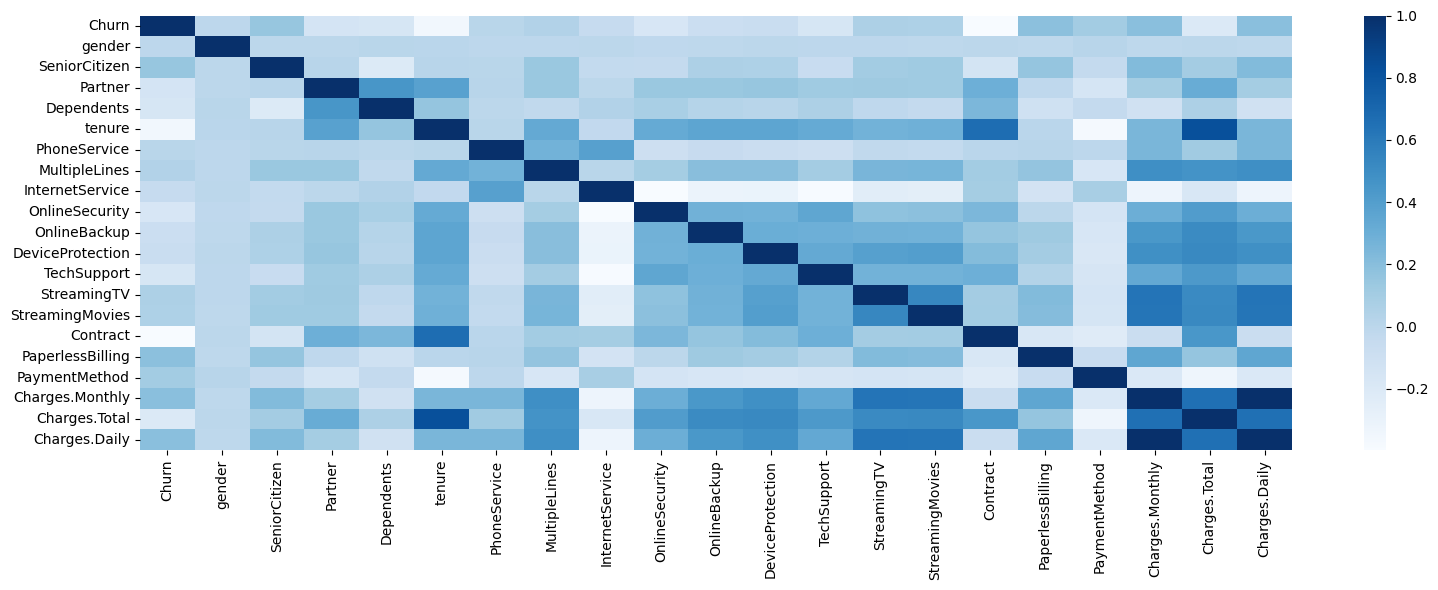

In [81]:
plt.rcParams['figure.figsize'] = (16,6)
ax = sns.heatmap(dados2.corr(), cmap = 'Blues') #gera correlação entre variaveis numericas

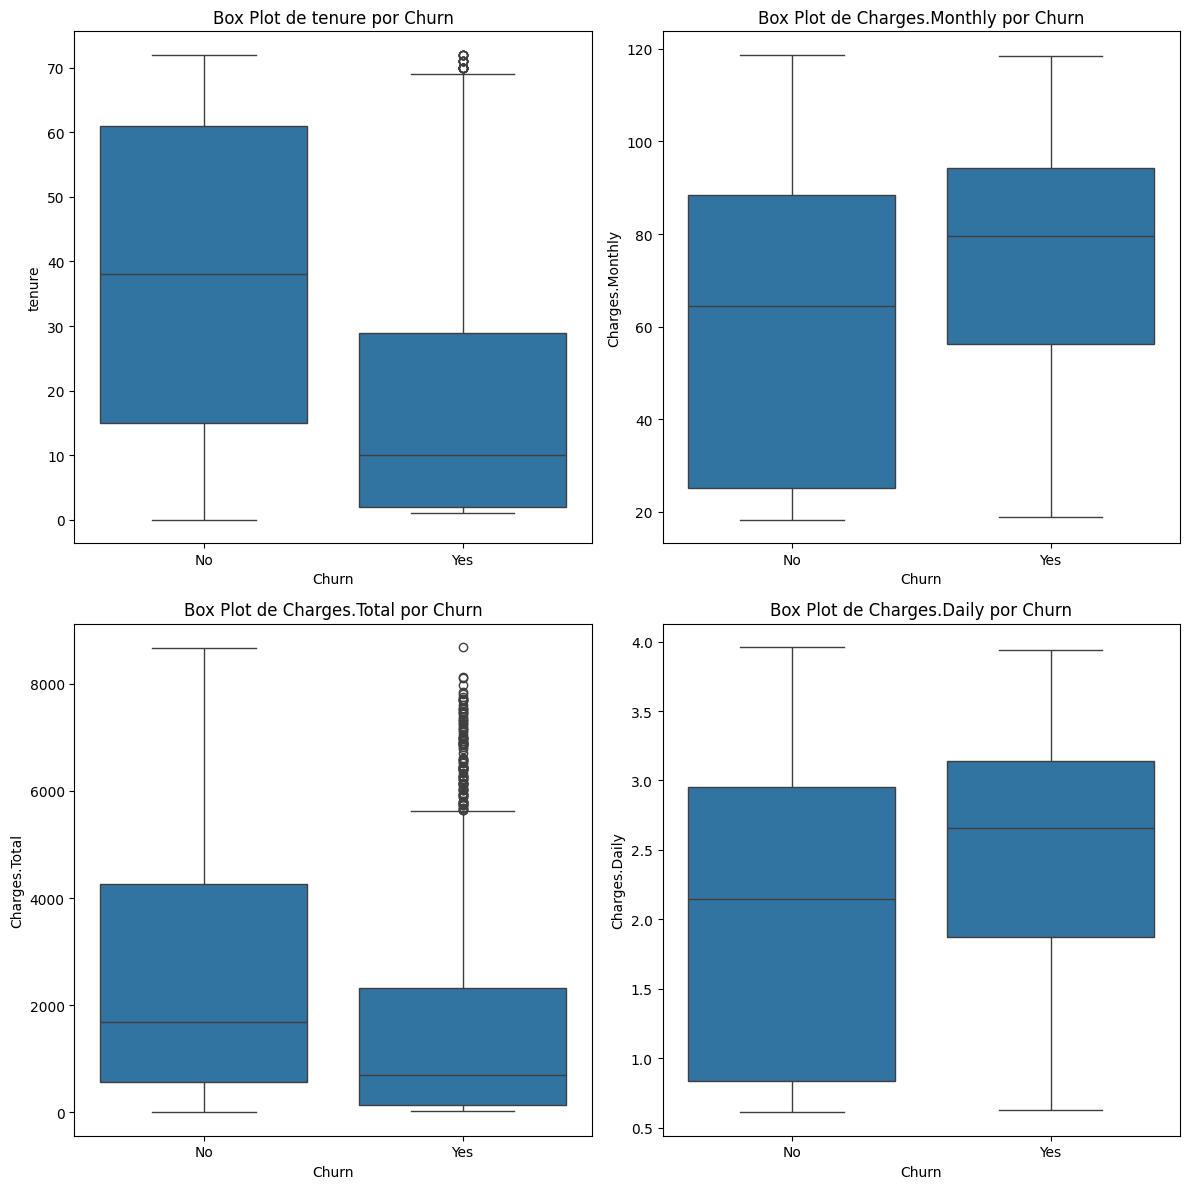

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Número de colunas no grid de subplots
n_cols = 2
# Calcular o número de linhas necessário
n_rows = math.ceil(len(colunas_numericas) / n_cols)

# Criar a figura com subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))
axes = axes.flatten() # Aplainar para facilitar a iteração

# Adicionar os box plots à figura
for i, coluna in enumerate(colunas_numericas):
    sns.boxplot(x='Churn', y=coluna, data=dados, ax=axes[i])
    axes[i].set_title(f'Box Plot de {coluna} por Churn')

# Remover eixos extras
for i in range(len(colunas_numericas), len(axes)):
    fig.delaxes(axes[i])

# Ajustar o layout
plt.tight_layout()
plt.show()

#Verificação da Proporção da classe alvo (classe desbalanceada)

In [82]:
dados['Churn'].value_counts(normalize = True)

,proportion
Churn,
No,0.73463
Yes,0.26537


#Separação das variaveis explicativas e variavel alvo.

In [125]:
X = dados.drop('Churn', axis = 1)
y = dados['Churn']

#Encoder das classes explicativas

In [84]:
# Identificação de Colunas Categóricas em X

colunas_X = X.columns
colunas_X_categoricas = X.select_dtypes(include='object').columns.tolist()
colunas_X_categoricas

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [126]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'), colunas_X_categoricas
    ),
      remainder = 'passthrough',
      sparse_threshold=0)

X_encoder = one_hot.fit_transform(X)

X_encoder = pd.DataFrame(X_encoder, columns = one_hot.get_feature_names_out(colunas_X))
X_encoder

,onehotencoder__gender_Male,onehotencoder__SeniorCitizen_Yes,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__OnlineSecurity_Yes,...,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__tenure,remainder__Charges.Monthly,remainder__Charges.Total,remainder__Charges.Daily
0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,9.0,65.60,593.30,2.19
1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,9.0,59.90,542.40,2.00
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,4.0,73.90,280.85,2.46
3,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,13.0,98.00,1237.85,3.27
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,3.0,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,13.0,55.15,742.90,1.84
7039,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,22.0,85.10,1873.70,2.84
7040,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,2.0,50.30,92.75,1.68
7041,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,67.0,67.85,4627.65,2.26


#Normalização das classes explicativas

In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalizado = scaler.fit_transform(X_encoder)
pd.DataFrame(X_normalizado, columns = one_hot.get_feature_names_out(colunas_X))

,onehotencoder__gender_Male,onehotencoder__SeniorCitizen_Yes,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__OnlineSecurity_Yes,...,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__tenure,remainder__Charges.Monthly,remainder__Charges.Total,remainder__Charges.Daily
0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.125000,0.471144,0.068315,0.471642
1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.125000,0.414428,0.062454,0.414925
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.055556,0.553731,0.032338,0.552239
3,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.180556,0.793532,0.142531,0.794030
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.041667,0.653234,0.030789,0.653731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.180556,0.367164,0.085540,0.367164
7039,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.305556,0.665174,0.215745,0.665672
7040,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.027778,0.318905,0.010680,0.319403
7041,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.930556,0.493532,0.532845,0.492537


#Encoder da classe alvo

In [87]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoder = label_encoder.fit_transform(y)
y_encoder

array([0, 0, 1, ..., 0, 0, 0])

#Verificação da correlação entre as variaveis

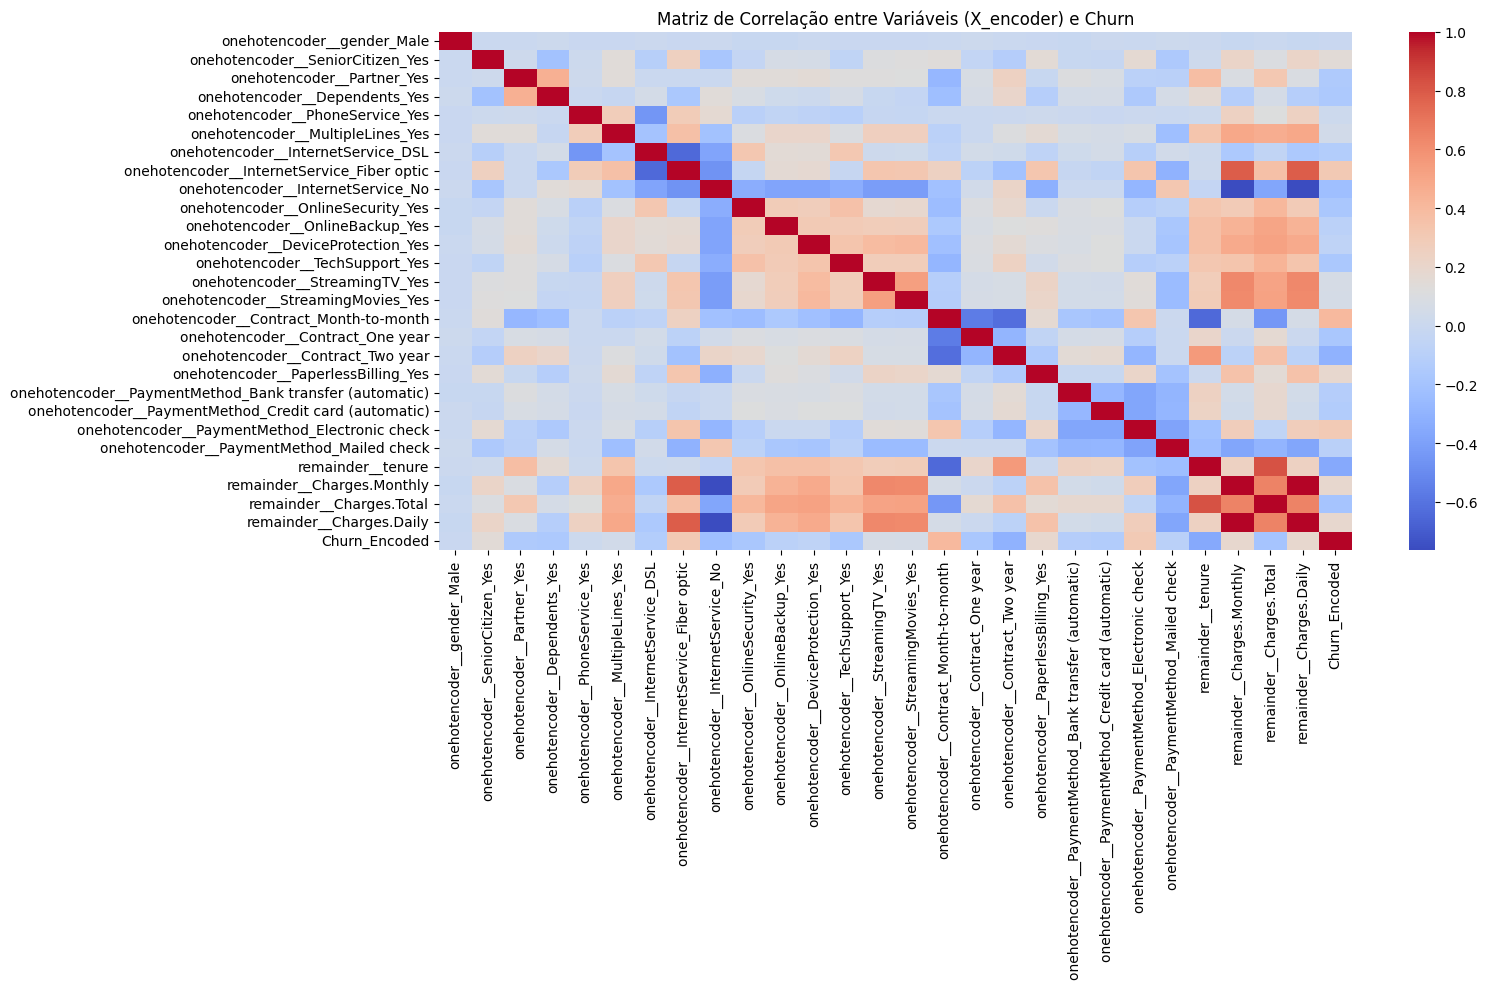


Análise da Correlação com a Variável Alvo ('Churn_Encoded'):


,Churn_Encoded
Churn_Encoded,1.000000
onehotencoder__Contract_Month-to-month,0.405103
onehotencoder__InternetService_Fiber optic,0.308020
onehotencoder__PaymentMethod_Electronic check,0.301919
remainder__Charges.Daily,0.193412
remainder__Charges.Monthly,0.193356
onehotencoder__PaperlessBilling_Yes,0.191825
onehotencoder__SeniorCitizen_Yes,0.150889
onehotencoder__StreamingTV_Yes,0.063228
onehotencoder__StreamingMovies_Yes,0.061382


In [113]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Combinar o DataFrame X_encoder com a variável alvo y_encoder
# Primeiro, crie uma Series para y_encoder com o mesmo índice que X_encoder
y_encoder_series = pd.Series(y_encoder, name='Churn_Encoded', index=X_encoder.index)

# Concatene X_encoder e y_encoder_series
data_for_corr_encoded = pd.concat([X_encoder, y_encoder_series], axis=1)

# Calcular a matriz de correlação
correlation_matrix_encoded = data_for_corr_encoded.corr()

# Exibir a matriz de correlação como um heatmap
plt.figure(figsize=(16, 10))  # Ajuste o tamanho para melhor visualização
sns.heatmap(correlation_matrix_encoded, annot=False, cmap='coolwarm') # annot=False para não sobrecarregar
plt.title('Matriz de Correlação entre Variáveis (X_encoder) e Churn')
plt.show()

# Exibir as correlações da variável alvo ('Churn_Encoded') com as outras variáveis
print("\nAnálise da Correlação com a Variável Alvo ('Churn_Encoded'):")
# Ordenar os valores para ver as correlações mais fortes
display(correlation_matrix_encoded['Churn_Encoded'].sort_values(ascending=False))

#Separando os dados de treino (80%), validação(10%) e teste(10%)

In [124]:
from sklearn.model_selection import train_test_split
# Dividindo os dados em treino (80%) e um conjunto temporário (20%)
X_treino, X_temp, y_treino, y_temp = train_test_split(X_normalizado, y_encoder, test_size=0.2, random_state=42, stratify=y_encoder)

# Dividindo o conjunto temporário em validação (10%) e teste (10%)
X_validacao, X_teste, y_validacao, y_teste = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

#Balanceado as classes alvo e explicativas (Usando o metodo SMOTE)

In [114]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 10 )
X_balanceado, y_balanceado = smote.fit_resample(X_treino, y_treino)
pd.DataFrame(X_balanceado, columns = one_hot.get_feature_names_out(colunas_X)).head(20)

,onehotencoder__gender_Male,onehotencoder__SeniorCitizen_Yes,onehotencoder__Partner_Yes,onehotencoder__Dependents_Yes,onehotencoder__PhoneService_Yes,onehotencoder__MultipleLines_Yes,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__OnlineSecurity_Yes,...,onehotencoder__Contract_Two year,onehotencoder__PaperlessBilling_Yes,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,remainder__tenure,remainder__Charges.Monthly,remainder__Charges.Total,remainder__Charges.Daily
0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.833333,0.754726,0.630515,0.755224
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.166667,0.010945,0.024445,0.008955
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.027778,0.618905,0.015786,0.617910
3,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.458333,0.562189,0.282482,0.561194
4,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.194444,0.674129,0.134033,0.674627
5,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.000000,0.907960,0.904442,0.907463
6,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.416667,0.315920,0.169825,0.316418
7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.069444,0.009950,0.009908,0.008955
8,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.958333,0.381095,0.455123,0.379104
9,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.805556,0.675124,0.563110,0.674627


In [115]:
pd.DataFrame(y_balanceado).shape

(8278, 1)

#Treinando os modelos

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

#Treinando o modelo LogisticRegression

Precisão: 0.64
Revocação: 0.5133689839572193
F1-score: 0.56973293768546
              precision    recall  f1-score   support

           0       0.84      0.90      0.86       517
           1       0.64      0.51      0.57       187

    accuracy                           0.79       704
   macro avg       0.74      0.70      0.72       704
weighted avg       0.78      0.79      0.79       704



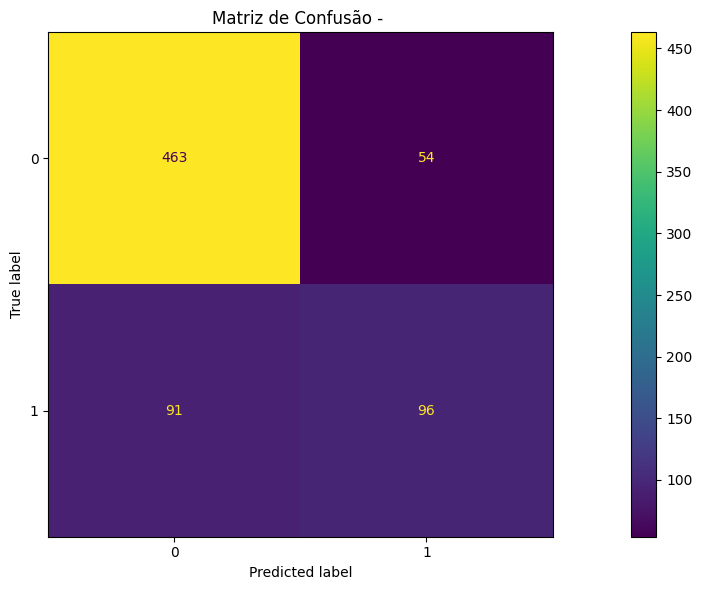

In [93]:
modelo_lr = LogisticRegression(random_state = 10)
modelo_lr.fit(X_treino, y_treino)
y_previsto_lr = modelo_lr.predict(X_validacao)

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
print(f'Precisão: {precision_score(y_validacao, y_previsto_lr)}')
print(f'Revocação: {recall_score(y_validacao, y_previsto_lr)}')
print(f'F1-score: {f1_score(y_validacao, y_previsto_lr)}')

print(classification_report(y_validacao, y_previsto_lr))
cm_lr = confusion_matrix(y_validacao, y_previsto_lr)
ConfusionMatrixDisplay(confusion_matrix=cm_lr).plot();
plt.title('Matriz de Confusão - ')
plt.show()
plt.show()

#Treinando o modelo RandomForestClassifier

Precisão: 0.6575342465753424
Revocação: 0.5133689839572193
F1-score: 0.5765765765765766
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       517
           1       0.66      0.51      0.58       187

    accuracy                           0.80       704
   macro avg       0.75      0.71      0.72       704
weighted avg       0.79      0.80      0.79       704



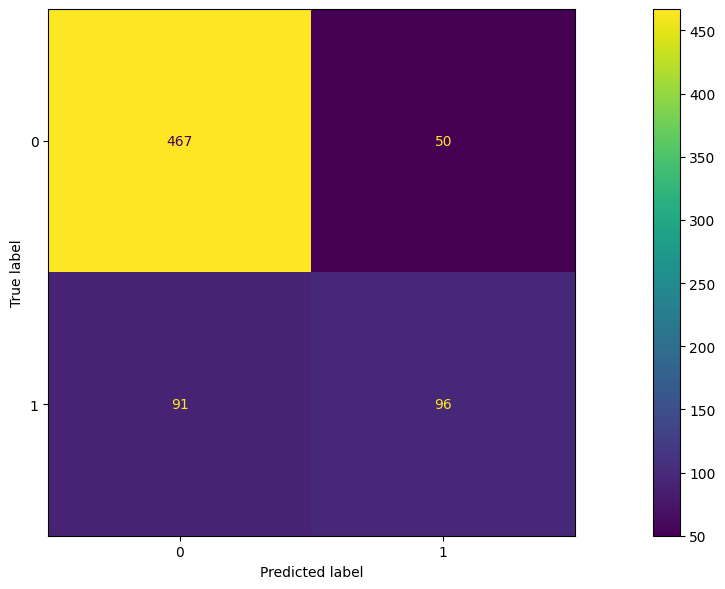

In [94]:
modelo_rf = RandomForestClassifier(random_state = 10)
modelo_rf.fit(X_treino, y_treino)
y_previsto_rf = modelo_rf.predict(X_validacao)


print(f'Precisão: {precision_score(y_validacao, y_previsto_rf)}')
print(f'Revocação: {recall_score(y_validacao, y_previsto_rf)}')
print(f'F1-score: {f1_score(y_validacao, y_previsto_rf)}')

print(classification_report(y_validacao, y_previsto_rf))
cm_rf = confusion_matrix(y_validacao, y_previsto_rf)
ConfusionMatrixDisplay(confusion_matrix=cm_rf).plot();

#Treinando o modelo GradientBoostingClassifier

Precisão: 0.6644295302013423
Revocação: 0.5294117647058824
F1-score: 0.5892857142857143
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       517
           1       0.66      0.53      0.59       187

    accuracy                           0.80       704
   macro avg       0.75      0.72      0.73       704
weighted avg       0.79      0.80      0.80       704



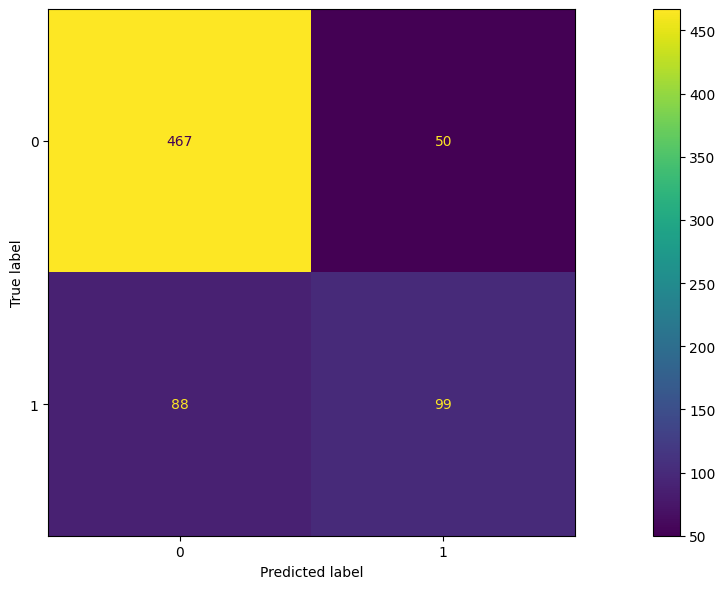

In [95]:
modelo_gb = GradientBoostingClassifier(random_state=10)
modelo_gb.fit(X_treino, y_treino)
y_previsto_gb = modelo_gb.predict(X_validacao)


print(f'Precisão: {precision_score(y_validacao, y_previsto_gb)}')
print(f'Revocação: {recall_score(y_validacao, y_previsto_gb)}')
print(f'F1-score: {f1_score(y_validacao, y_previsto_gb)}')

print(classification_report(y_validacao, y_previsto_gb))
cm_gb = confusion_matrix(y_validacao, y_previsto_gb)
ConfusionMatrixDisplay(confusion_matrix=cm_gb).plot();

# Treinando o modelo SVC

Resultados para o modelo SVC:
Precisão: 0.6691729323308271
Revocação: 0.47593582887700536
F1-score: 0.55625
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       517
           1       0.67      0.48      0.56       187

    accuracy                           0.80       704
   macro avg       0.75      0.70      0.71       704
weighted avg       0.79      0.80      0.79       704



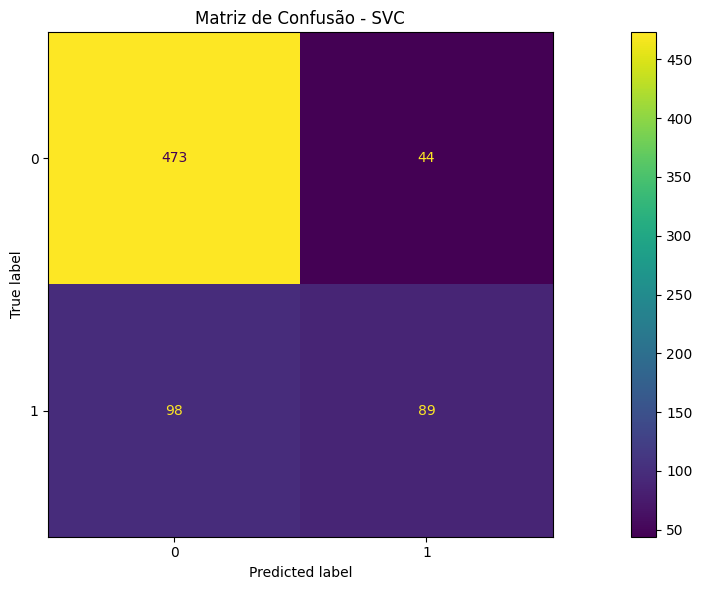

In [96]:
modelo_svc = SVC(random_state=10)
modelo_svc.fit(X_treino, y_treino)
y_previsto_svc = modelo_svc.predict(X_validacao)

print("Resultados para o modelo SVC:")
print(f'Precisão: {precision_score(y_validacao, y_previsto_svc)}')
print(f'Revocação: {recall_score(y_validacao, y_previsto_svc)}')
print(f'F1-score: {f1_score(y_validacao, y_previsto_svc)}')

print(classification_report(y_validacao, y_previsto_svc))
cm_svc = confusion_matrix(y_validacao, y_previsto_svc)
ConfusionMatrixDisplay(confusion_matrix=cm_svc).plot();
plt.title('Matriz de Confusão - SVC')
plt.show()

# Treinando o modelo LGBMClassifier

[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 865
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328
Resultados para o modelo LGBMClassifier:
Precisão: 0.631578947368421
Revocação: 0.5133689839572193
F1-score: 0.5663716814159292
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       517
           1       0.63      0.51      0.57       187

    accuracy                           0.79       704
   macro avg       0.73      0.70      0.71       704
weighted avg       0.78      0.79      0.78   

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


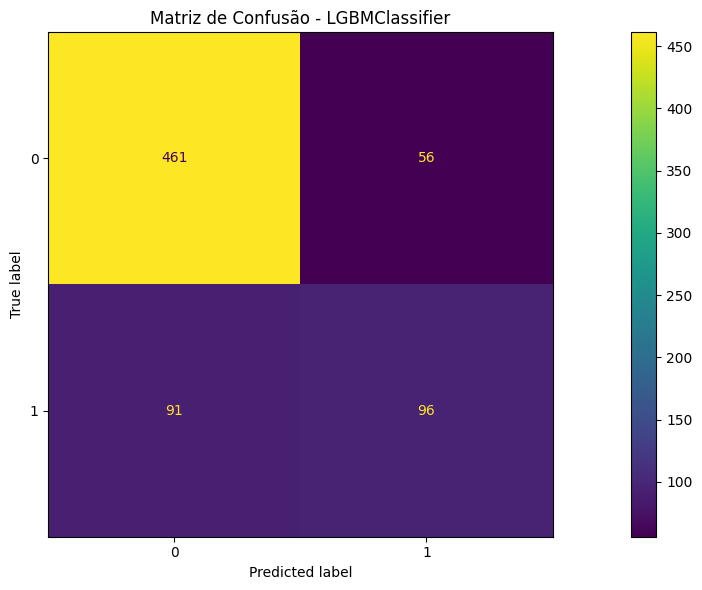

In [97]:
modelo_lgbm = LGBMClassifier(random_state=10)
modelo_lgbm.fit(X_treino, y_treino)
y_previsto_lgbm = modelo_lgbm.predict(X_validacao)

print("Resultados para o modelo LGBMClassifier:")
print(f'Precisão: {precision_score(y_validacao, y_previsto_lgbm)}')
print(f'Revocação: {recall_score(y_validacao, y_previsto_lgbm)}')
print(f'F1-score: {f1_score(y_validacao, y_previsto_lgbm)}')

print(classification_report(y_validacao, y_previsto_lgbm))
cm_lgbm = confusion_matrix(y_validacao, y_previsto_lgbm)
ConfusionMatrixDisplay(confusion_matrix=cm_lgbm).plot();
plt.title('Matriz de Confusão - LGBMClassifier')
plt.show()

#Comparação das metricas dos Modelos

In [98]:
# Coletando as métricas de cada modelo
# Logistic Regression
lr_precisao = precision_score(y_validacao, y_previsto_lr)
lr_recall = recall_score(y_validacao, y_previsto_lr)
lr_f1 = f1_score(y_validacao, y_previsto_lr)

# Random Forest
rf_precisao = precision_score(y_validacao, y_previsto_rf)
rf_recall = recall_score(y_validacao, y_previsto_rf)
rf_f1 = f1_score(y_validacao, y_previsto_rf)

# Gradient Boosting
gb_precisao = precision_score(y_validacao, y_previsto_gb)
gb_recall = recall_score(y_validacao, y_previsto_gb)
gb_f1 = f1_score(y_validacao, y_previsto_gb)

# SVC
svc_precisao = precision_score(y_validacao, y_previsto_svc)
svc_recall = recall_score(y_validacao, y_previsto_svc)
svc_f1 = f1_score(y_validacao, y_previsto_svc)

# LGBMClassifier
lgbm_precisao = precision_score(y_validacao, y_previsto_lgbm)
lgbm_recall = recall_score(y_validacao, y_previsto_lgbm)
lgbm_f1 = f1_score(y_validacao, y_previsto_lgbm)


# Criando um DataFrame para comparação
comparativo_modelos = pd.DataFrame({
    'Modelo': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVC', 'LGBMClassifier'],
    'Precisão': [lr_precisao, rf_precisao, gb_precisao, svc_precisao, lgbm_precisao],
    'Recall (Revocação)': [lr_recall, rf_recall, gb_recall, svc_recall, lgbm_recall],
    'F1-score': [lr_f1, rf_f1, gb_f1, svc_f1, lgbm_f1]
})

# Exibindo o DataFrame comparativo
print("Comparativo de Desempenho dos Modelos:")
display(comparativo_modelos.sort_values(by='F1-score', ascending=False))

Comparativo de Desempenho dos Modelos:


,Modelo,Precisão,Recall (Revocação),F1-score
2,Gradient Boosting,0.664430,0.529412,0.589286
1,Random Forest,0.657534,0.513369,0.576577
0,Logistic Regression,0.640000,0.513369,0.569733
4,LGBMClassifier,0.631579,0.513369,0.566372
3,SVC,0.669173,0.475936,0.556250


#Otimização dos hiperparâmetros com enfase no recall_score

In [100]:
from sklearn.model_selection import GridSearchCV

# Definindo a grade de parâmetros para o Gradient Boosting
parametros = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Criando o objeto GridSearchCV com scoring='recall'
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=10),
                                   param_grid=parametros,
                                   cv=5,  # 5-fold cross-validation
                                   scoring='recall',
                                   n_jobs=-1)

# Ajustando o GridSearchCV aos dados de treino
grid_search.fit(X_treino, y_treino)

# Exibindo os melhores parâmetros encontrados para recall
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

# Exibindo o melhor recall encontrado durante a busca
print(f"\nMelhor recall: {grid_search.best_score_}")

Melhores parâmetros encontrados para recall:
{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}

Melhor recall: 0.534448160535117


In [117]:
# Criando o modelo com os melhores parâmetros para recall
modelo_gb = GradientBoostingClassifier(random_state=10,
                                               learning_rate=0.2,
                                               max_depth=3,
                                               n_estimators=100)

# Treinando o modelo com os dados de treino
modelo_gb.fit(X_treino, y_treino)

# Fazendo previsões no conjunto de validação
y_previsto_gb_val = modelo_gb.predict(X_validacao)

# Avaliando o modelo no conjunto de validação
print("Resultados no conjunto de validação:")
print(classification_report(y_validacao, y_previsto_gb_val))

Resultados no conjunto de validação (otimizado para recall):
              precision    recall  f1-score   support

           0       0.84      0.90      0.86       517
           1       0.64      0.51      0.57       187

    accuracy                           0.79       704
   macro avg       0.74      0.70      0.72       704
weighted avg       0.78      0.79      0.79       704



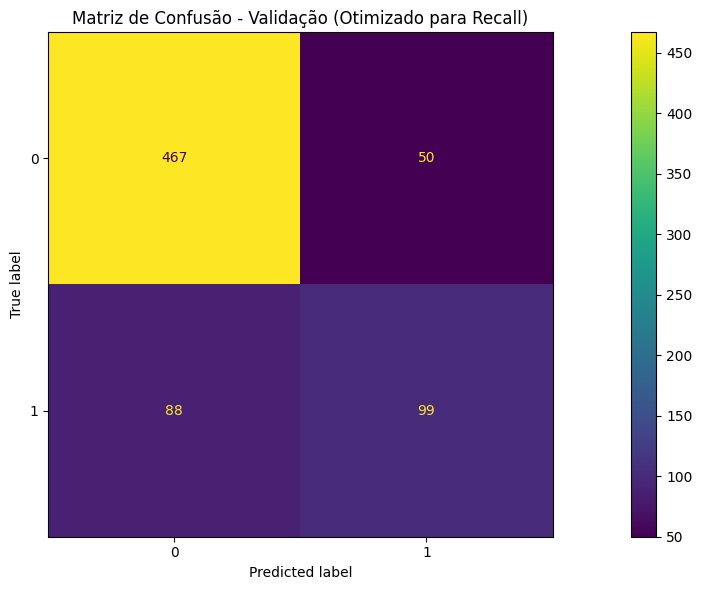

In [118]:
# Matriz de confusão para o conjunto de validação
cm_gb = confusion_matrix(y_validacao, y_previsto_gb)
ConfusionMatrixDisplay(confusion_matrix=cm_gb).plot();
plt.title('Matriz de Confusão - Validação)')
plt.show()

In [119]:
# Avaliação final no conjunto de teste
print("\nResultados no conjunto de teste:")
y_previsto_gb_teste = modelo_gb.predict(X_teste)
print(classification_report(y_teste, y_previsto_gb_teste))


Resultados no conjunto de teste (otimizado para recall):
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       518
           1       0.60      0.50      0.55       187

    accuracy                           0.78       705
   macro avg       0.72      0.69      0.70       705
weighted avg       0.77      0.78      0.77       705



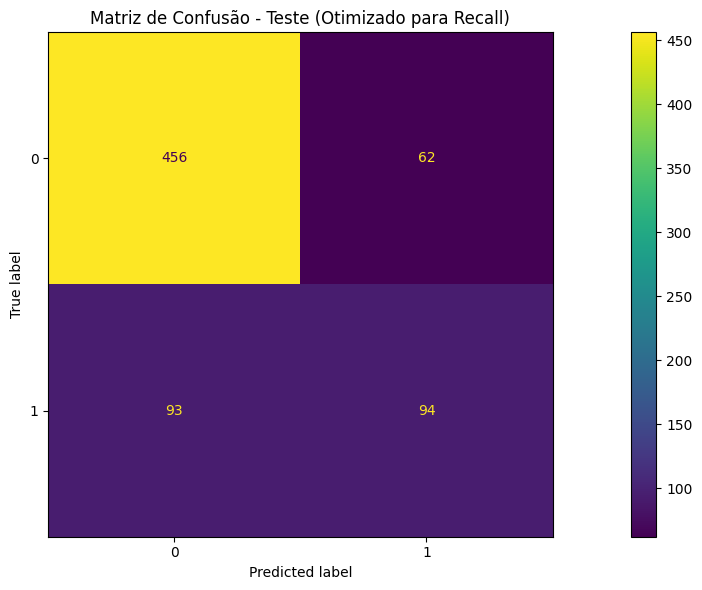

In [120]:
# Matriz de confusão para o conjunto de teste
cm_gb_teste = confusion_matrix(y_teste, y_previsto_gb_teste)
ConfusionMatrixDisplay(confusion_matrix=cm_gb_teste).plot();
plt.title('Matriz de Confusão - Teste')
plt.show()

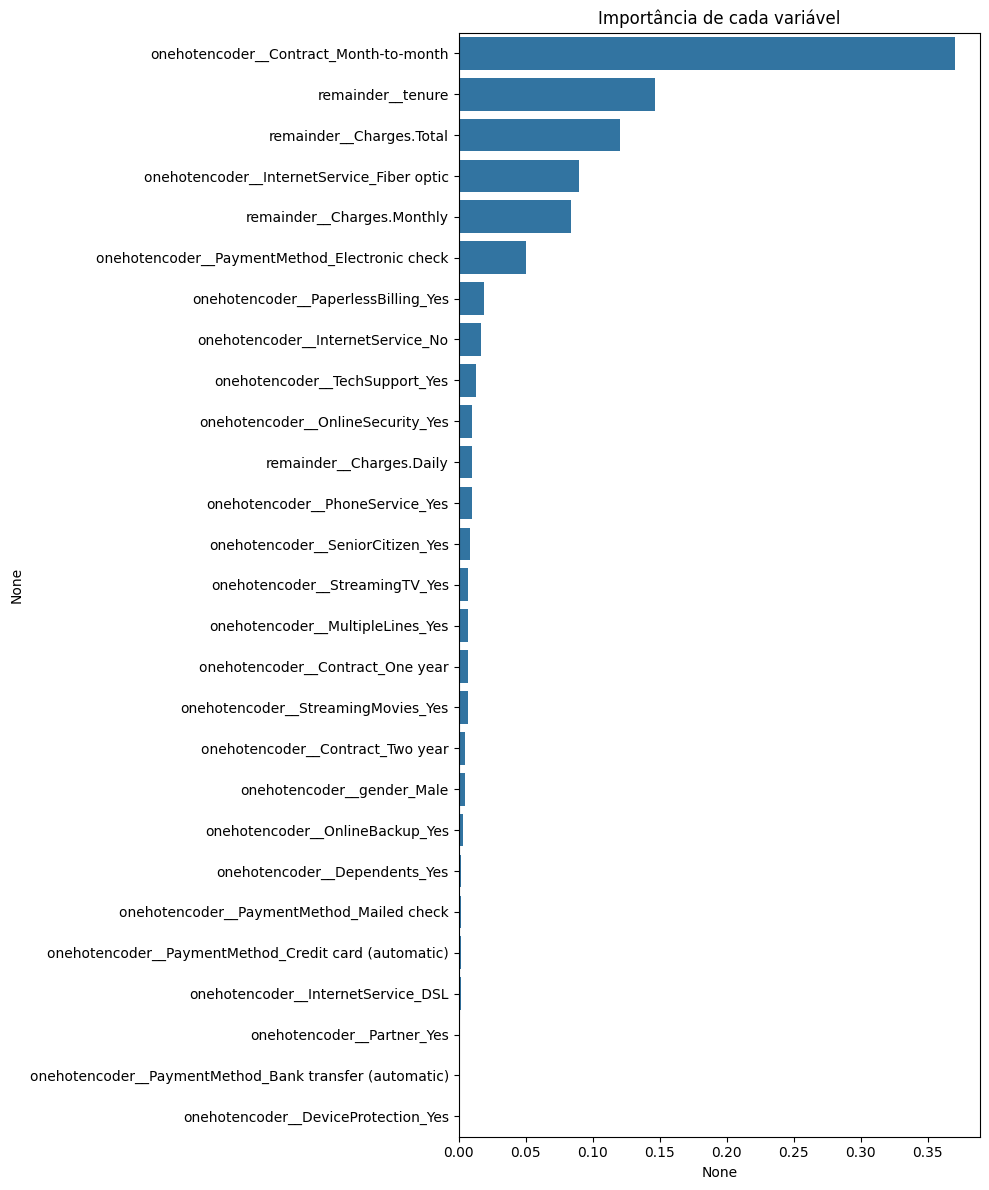

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exibindo a importancia de cada variavel no modelo preditivo
plt.figure(figsize=(10, 12))
importances = pd.Series(data=modelo_gb.feature_importances_, index=X_encoder.columns)
importances = importances.sort_values(ascending=False)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada variável')
plt.tight_layout()
plt.show()

In [123]:
print('Comparativo de Métricas para os Conjuntos de Dados')

# Métricas de Treino
y_previsto_gb_treino = modelo_gb.predict(X_treino)
recall_treino = recall_score(y_treino, y_previsto_gb_treino)
precisao_treino = precision_score(y_treino, y_previsto_gb_treino)
f1_treino = f1_score(y_treino, y_previsto_gb_treino)

# Métricas de Validação
recall_validacao = recall_score(y_validacao, y_previsto_gb_val)
precisao_validacao = precision_score(y_validacao, y_previsto_gb_val)
f1_validacao = f1_score(y_validacao, y_previsto_gb_val)

# Métricas de Teste
recall_teste = recall_score(y_teste, y_previsto_gb_teste)
precisao_teste = precision_score(y_teste, y_previsto_gb_teste)
f1_teste = f1_score(y_teste, y_previsto_gb_teste)


pd.DataFrame({
    'Métrica (para a classe "Churn")': ['Recall', 'Precisão', 'F1-score'],
    'Treino': [recall_treino, precisao_treino, f1_treino],
    'Validação': [recall_validacao, precisao_validacao, f1_validacao],
    'Teste': [recall_teste, precisao_teste, f1_teste]
})

Comparativo de Métricas para os Conjuntos de Dados


,"Métrica (para a classe ""Churn"")",Treino,Validação,Teste
0,Recall,0.626756,0.513369,0.502674
1,Precisão,0.761170,0.640000,0.602564
2,F1-score,0.687454,0.569733,0.548105


# Relatório de Análise de Churn de Clientes

## 1. Introdução

Este relatório apresenta os resultados de um projeto de machine learning para prever o churn (cancelamento) de clientes em uma empresa de telecomunicações. O objetivo principal foi construir um modelo preditivo para identificar clientes com alta probabilidade de cancelar o serviço, permitindo que a empresa tome ações proativas para retê-los.

## 2. Metodologia

O projeto seguiu as seguintes etapas:

1.  **Coleta e Pré-processamento de Dados:** Os dados dos clientes foram carregados e pré-processados, incluindo a transformação de variáveis categóricas em numéricas e a normalização dos dados.
2.  **Análise Exploratória de Dados:** Foi realizada uma análise para entender a distribuição dos dados e a correlação entre as variáveis.
3.  **Divisão dos Dados:** Os dados foram divididos em conjuntos de treino (80%), validação (10%) e teste (10%).
4.  **Seleção e Treinamento de Modelos:** Vários modelos de classificação foram treinados e avaliados, incluindo Regressão Logística, Random Forest, Gradient Boosting, SVC e LGBMClassifier.
5.  **Otimização de Hiperparâmetros:** O modelo com melhor desempenho (Gradient Boosting) foi otimizado para maximizar a métrica de recall.

## 3. Resultados

O modelo final escolhido foi o **Gradient Boosting**, otimizado para recall. Os resultados no conjunto de teste foram os seguintes:

*   **Recall:** 50%
*   **Precisão:** 60%
*   **Acurácia:** 78%

Isso significa que o modelo é capaz de identificar corretamente **metade dos clientes que realmente cancelariam o serviço**.

### Fatores Mais Importantes para o Churn

A análise da importância das variáveis revelou os seguintes fatores como os mais influentes na previsão de churn:

1.  **Tipo de Contrato:** Clientes com contrato mensal são os mais propensos a cancelar.
2.  **Tempo de Permanência (Tenure):** Clientes mais novos têm maior probabilidade de churn.
3.  **Valor Total Cobrado:** O valor total cobrado do cliente é um fator relevante.
4.  **Serviço de Internet:** Clientes com fibra ótica apresentaram maior propensão ao churn.
5.  **Cobrança Mensal:** Valores mensais mais altos estão associados a um maior risco de churn.

## 4. Conclusão e Recomendações

O modelo de machine learning desenvolvido pode ser uma ferramenta valiosa para a empresa reduzir o churn de clientes. Com base nos resultados, recomendamos as seguintes ações:

*   **Focar em Clientes de Alto Risco:** Direcionar as campanhas de retenção para clientes com contrato mensal e baixo tempo de permanência.
*   **Incentivar Contratos de Longo Prazo:** Oferecer benefícios para que os clientes com contrato mensal migrem para planos anuais ou de dois anos.
*   **Melhorar a Experiência do Novo Cliente:** Implementar um programa de acompanhamento nos primeiros meses para garantir a satisfação dos novos clientes.
*   **Investigar o Serviço de Fibra Ótica:** Analisar se há problemas de qualidade, preço ou atendimento relacionados a este serviço.

A implementação dessas estratégias, guiada pelos insights do modelo, tem o potencial de aumentar a retenção de clientes e, consequentemente, a lucratividade da empresa.